In [2]:
'''
Author: Harshad Sathaye
'''

import numpy as np
import matplotlib.pyplot as plt

'''
Common values for all modulation techniques
'''
samp_rate = 50 # 50 samples/s
bitrate = 1 # 1 bits/s - 1 symbol = 1 bit

carr_freq = 2 # Hz
dfreq = 1 # Hz


### PSK - Phase Shift Keying

In this digital modulation technique phase shift marks a bit transition.
In this lab we are going to implement binary phase shift keying where a phase shift of 180° in the carrier marks bit transition.

In reality, because of wireless channel, the effect of environment on it and irregularities in clocks at Tx and Rx, the constellation can rotate i.e., experience phase shifts as shown in the following figure.

The BPSK signal is represented as:

$s_{1}(t)$ = $A sin(2\pi f_{c}t)$ - For bit 1 <br>
$s_{0}(t)$ = $A sin(2\pi f_{c}t + \pi)$ - For bit 0

    

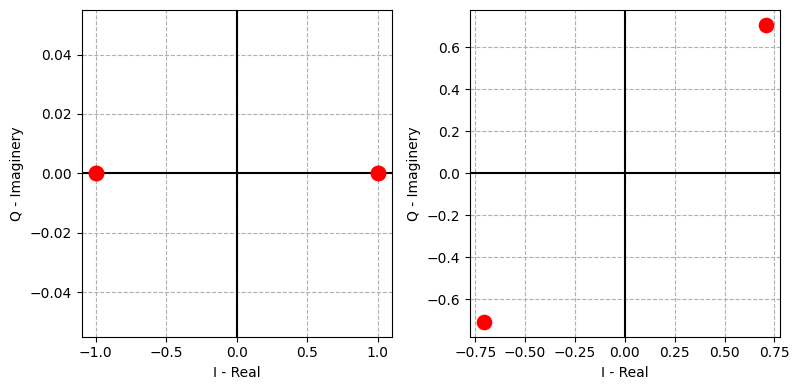

In [3]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].axvline(0, color='k')
ax[0].axhline(0, color='k')
ax[0].set_xlabel("I - Real")
ax[0].set_ylabel("Q - Imaginery")
ax[0].scatter([-1, 1], np.zeros(2), s=105, color='red', marker='o', zorder=3)
ax[0].scatter([-1, 1], np.zeros(2), s=105, color='red', marker='o', zorder=3)
ax[0].grid(True, linestyle='--')

p1 = 1 + 0j
p2 = p1 * complex((np.cos(np.pi/4)),(np.sin(np.pi/4)))
ax[1].scatter(np.real(p2), np.imag(p2), s=105, color='red', marker='o', zorder=3)
p2 = -p1 * complex((np.cos(np.pi/4)),(np.sin(np.pi/4)))
ax[1].scatter(np.real(p2), np.imag(p2), s=105, color='red', marker='o', zorder=3)
ax[1].axvline(0, color='k')
ax[1].axhline(0, color='k')
ax[1].set_xlabel("I - Real")
ax[1].set_ylabel("Q - Imaginery")
ax[1].grid(True, linestyle='--')
plt.tight_layout()

##### Step 1 - Generate a baseband signal

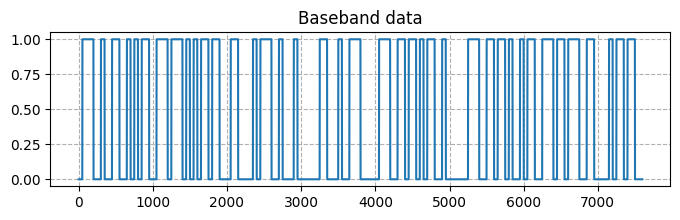

In [4]:
fig = plt.figure(figsize=(8,2))
#grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.3)

message = 'regular bpsk signal'
res = ''.join(format(ord(i), '08b') for i in message)
message_bits = np.array([int(bit) for bit in res])

baseband_data = np.kron(message_bits, np.ones(int(samp_rate / bitrate))) # 1 bit = sample_rate/bitrate

plt.plot(baseband_data)
plt.title("Baseband data")
plt.grid(True, linestyle='--')

##### Step 2 - Convert data to polar form to get the necessary phase shift i.e., 0 -> -1
Inverting the amplitude of the signal is equivalent to shifting the phase of the signal by $\pi$ radians. <br>
As $sin(\theta + \pi)$ = $-1 * sin(\theta)$

Text(0.5, 1.0, 'Baseband data - Polar form')

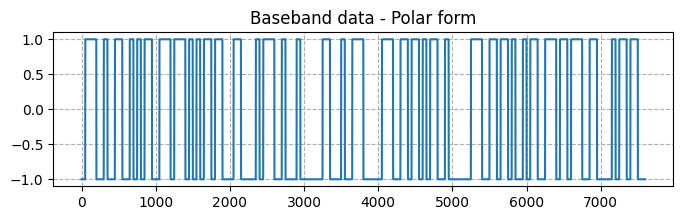

In [5]:
polar_baseband_data = (baseband_data * 2 ) - 1
ax, fig = plt.subplots(figsize=(8, 2))

plt.grid(True, linestyle='--')
plt.plot(polar_baseband_data)
plt.title("Baseband data - Polar form")

##### Step 3 - Generate a carrier signal and modulate

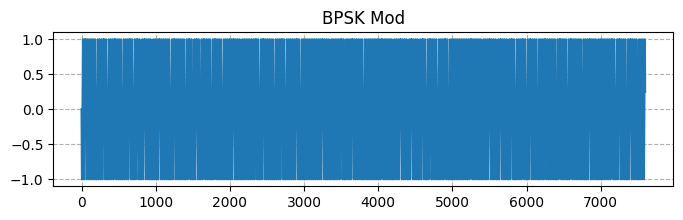

In [6]:
c_samples = np.arange(len(baseband_data))
carrier = np.sin(2*np.pi*carr_freq*c_samples/samp_rate)

bpsk_mod = carrier * polar_baseband_data

ax, fig = plt.subplots(figsize=(8, 2))
plt.plot(bpsk_mod)

plt.title("BPSK Mod")
plt.grid(True, linestyle='--')

for s in bpsk_mod:
    with open("bpsk_waveform_1.dat","ab") as f:
        f.write(s)

In [17]:
# Load BPSK-modulated waveform from file
bpsk_waveform = np.fromfile("bpsk_waveform_1.dat")

# Demodulator for BPSK
def bpsk_demodulator(received_signal, samp_rate, carr_freq):
    c_samples = np.arange(len(received_signal))

    # Generate the carrier signal for demodulation - FOR BPSK_WAVEFORM-1
    carrier = np.sin((2*np.pi*carr_freq*c_samples/samp_rate))
    
    # Generate the carrier signal for demodulation - FOR BPSK_WAVEFORM-2
    # carrier = np.sin((2*np.pi*carr_freq*c_samples/samp_rate) + np.pi/2)

    # Demodulate the received signal
    demodulated_bits = received_signal * carrier

    # Integrate over symbol duration to make decisions
    decision_bits = np.sum(demodulated_bits.reshape(-1, int(samp_rate/bitrate)), axis=1)

    # Apply threshold to make binary decisions
    demodulated_bits = np.where(decision_bits > 0, 1, 0)

    return demodulated_bits

# Example usage:
demodulated_bits = bpsk_demodulator(bpsk_waveform, samp_rate, carr_freq)

# Convert binary array to ASCII
demodulated_message = ''.join([str(bit) for bit in demodulated_bits])
demodulated_message = ''.join([chr(int(demodulated_message[i:i+8], 2)) for i in range(0, len(demodulated_message), 8)])

print("Demodulated ASCII Message:", demodulated_message) # we are getting repetitive demodulated message chuncks

Demodulated ASCII Message: regular bpsk signalregular bpsk signal
